In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import the video

In [30]:
video = "test_video.mp4" #video file name

Define functions to be called

In [31]:
def convert_to_gray(vid):
    gray_scale = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    return gray_scale
def canny(vid):
    detec_edge = cv2.Canny(vid, 50, 150)
    return detec_edge
    
def Region_of_Interest(vid):
    height, width = vid.shape[:2]
    region_vertices = np.array([[(0, height), (width / 2, height / 2), (width, height)]], dtype=np.int32)
    mask = np.zeros_like(vid)
    cv2.fillPoly(mask,region_vertices, 255)
    bitwise_masked = cv2.bitwise_and(vid, mask)
    return bitwise_masked

def draw_lines(vid, lines, color =(255,0,0), thickness =5):
    
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(vid, (x1,y1), (x2,y2), color, thickness)
            

Executing the Algorithm

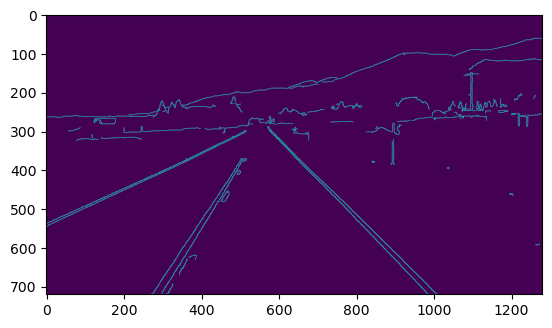

In [32]:
cap = cv2.VideoCapture(video)
if not cap.isOpened():
    print("Invalid file format !")
else:
    while True:
        ret, frame = cap.read() # to read frame from video
        if not ret:
            print("video has ended")
            break
            
        height, width = frame.shape[:2]
# converting color video input into gray scale            
        gray = convert_to_gray(frame)
# Detecting edge using canny edge algorithms 
        edge = canny(gray)
# Applying mask to the region of Interest
        Mask = Region_of_Interest(edge)
# Apply hough transform to detect straight lines
        Houghtrans = cv2.HoughLinesP(Mask, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
        Houghtrans_display = np.zeros_like(frame)  # Create a blank image

        if Houghtrans is not None:
            draw_lines(Houghtrans_display, Houghtrans, color=(0,255,0), thickness =2)

# Display lines 
        line_image = np.zeros((height, width, 3), dtype=np.uint8)
        draw_lines(line_image, Houghtrans)
# combo vid
        combo_vid = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
        
        cv2.imshow('Original', frame)
        cv2.imshow('gray_scale', gray)
        cv2.imshow('canny_edge', edge)
        cv2.imshow('Region_of_Interest',Mask)
        cv2.imshow('Hough_lines', Houghtrans_display)
        cv2.imshow("Lane_detection", combo_vid)
        plt.imshow(edge)
        # Lets define key "q" to close output upon clicking the key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

Just to check the edges extracted after processing canny algorithm

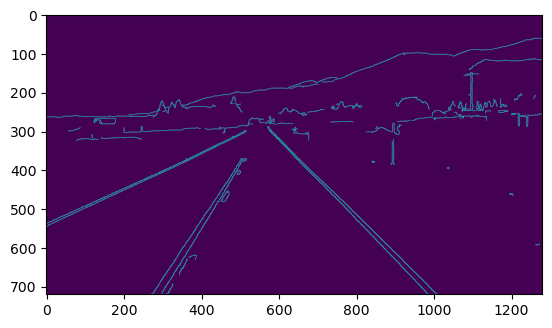

In [33]:
plt.imshow(edge)